# General function for compound interest simulation

In [40]:
using Plots
using DataFrames

# General function for compound interest simulation with line plot and DataFrame output
function compound_interest_simulation_test_with_dataframe(P, r, n, t_years)
    
    # Nested function to calculate future value
    function compound_interest(P, r, n, t, precision_type)
        return precision_type(P) * (1 + precision_type(r) / precision_type(n))^(n * t)
    end
    
    # Define an array for storing years
    years = 1:t_years
    A_single = Float32[]  # Array to store single precision results
    A_double = Float64[]  # Array to store double precision results

    # Calculate future values for single and double precision for each year
    for t in years
        push!(A_single, compound_interest(P, r, n, t, Float32))  # Single precision
        push!(A_double, compound_interest(P, r, n, t, Float64))  # Double precision
    end

    # Calculate absolute error between single and double precision results
    absolute_error = abs.(A_double .- A_single)

    # Line plot comparing future values in single and double precision
    p1 = plot(years, A_single, label="Single Precision", marker=:circle, color=:blue, legend=:topleft)
    plot!(p1, years, A_double, label="Double Precision", marker=:diamond, color=:red)
    title!(p1, "Future Value: Single vs Double Precision")
    xlabel!(p1, "Years")
    ylabel!(p1, "Future Value (USD)")
    savefig(p1, "future_value_plot_test.png")  # Save the line plot as PNG
    display(p1)  # Display line plot

    # Line plot for absolute error
    p2 = plot(years, absolute_error, marker=:square, color=:green, label="Absolute Error")
    title!(p2, "Absolute Error: Single vs Double Precision")
    xlabel!(p2, "Years")
    ylabel!(p2, "Absolute Error (USD)")
    savefig(p2, "error_plot_test.png")  # Save the line plot as PNG
    display(p2)  # Display line plot

    # Calculate Mean Squared Error (MSE)
    mse = sum((A_double .- A_single).^2) / t_years
    println("Mean Squared Error (MSE): ", mse)

    # Create a DataFrame with results, and repeat the MSE value for each row
    df = DataFrame(
        Years = years,
        SinglePrecision = A_single,
        DoublePrecision = A_double,
        AbsoluteError = absolute_error,
        MSE = fill(mse, t_years)  # Add MSE repeated for each year
    )
    
    return df, mse
end




create_dataframe_fdm (generic function with 2 methods)

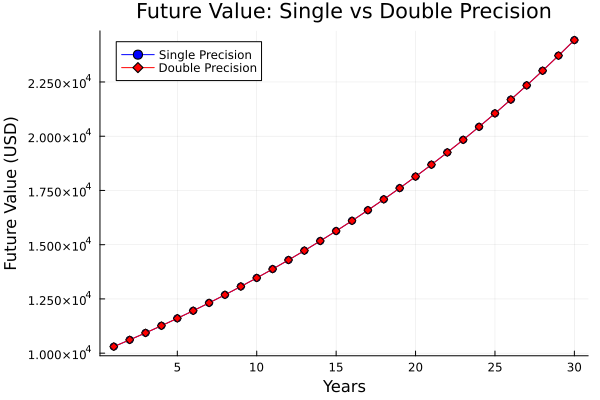

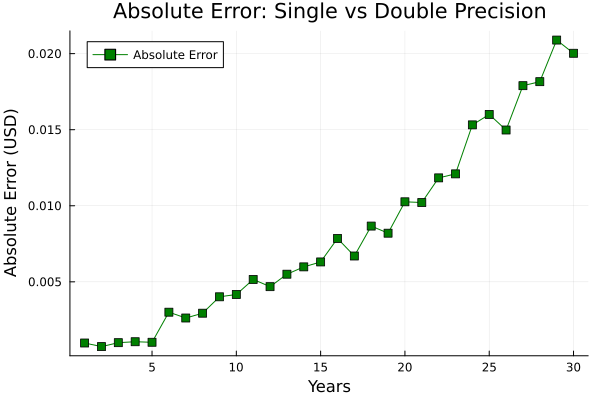

Mean Squared Error (MSE): 0.00010545446446927104
30×5 DataFrame
 Row │ Years  SinglePrecision  DoublePrecision  AbsoluteError  MSE         
     │ Int64  Float32          Float64          Float64        Float64     
─────┼─────────────────────────────────────────────────────────────────────
   1 │     1          10302.2          10302.2    0.000976562  0.000105454
   2 │     2          10613.6          10613.6    0.000740625  0.000105454
   3 │     3          10934.4          10934.4    0.000998801  0.000105454
   4 │     4          11264.9          11264.9    0.00106127   0.000105454
   5 │     5          11605.4          11605.4    0.00102369   0.000105454
   6 │     6          11956.2          11956.2    0.00300368   0.000105454
   7 │     7          12317.6          12317.6    0.00261944   0.000105454
   8 │     8          12689.9          12689.9    0.00293748   0.000105454
   9 │     9          13073.4          13073.4    0.00401457   0.000105454
  10 │    10          13468.5    

In [41]:
# Example with smaller, simpler inputs
P = 10_000.0   # Principal amount ($10,000)
r = 0.03       # Annual interest rate (3%)
n = 2          # Semi-annual compounding
t_years = 30    # Total number of years (shorter time frame for testing)

# Call the function and return DataFrame and MSE
df, mse = compound_interest_simulation_test_with_dataframe(P, r, n, t_years)

# Display the DataFrame and MSE
println(df)



# Finite difference method for compound interest simulation

In [46]:
using Plots
using DataFrames

# Finite difference method for compound interest simulation
function compound_interest_finite_diff(P, r, n, t_years)
    Δt = 1  # We assume a time step of 1 year (finite difference step size)

    # Initialize future values with principal amount
    A_single = Float32(P)
    A_double = Float64(P)
    
    # Arrays for storing values over time, including initial principal
    A_single_values = [Float32(P)]  # To store all single precision values over time
    A_double_values = [Float64(P)]  # To store all double precision values over time
    absolute_error = Float64[]  # To store absolute errors
    
    # Finite difference method: Update the future value year by year
    for t in 1:t_years
        # Update the future value using the recurrence relation for both precisions
        A_single *= (1 + Float32(r) / Float32(n))
        A_double *= (1 + Float64(r) / Float64(n))
        
        # Store the updated values
        push!(A_single_values, A_single)
        push!(A_double_values, A_double)

        # Calculate and store the absolute error between single and double precision
        push!(absolute_error, abs(A_double - A_single))
    end

    # Years array
    years = 0:t_years  # Include initial year (t=0)

    # Plot the future value over time
    p1 = plot(years, A_single_values, label="Single Precision", marker=:o, color=:blue, linestyle=:solid)
    plot!(p1, years, A_double_values, label="Double Precision", marker=:diamond, color=:red, linestyle=:dash)
    title!(p1, "Future Value: Single vs Double Precision (Finite D.E)")
    xlabel!(p1, "Years")
    ylabel!(p1, "Future Value (USD)")
    display(p1)

    # Plot the absolute error over time
    p2 = plot(years[2:end], absolute_error, label="Absolute Error", marker=:square, color=:green, linestyle=:solid)
    title!(p2, "Absolute Error: Single vs Double Precision (Finite D.E)")
    xlabel!(p2, "Years")
    ylabel!(p2, "Absolute Error (USD)")
    display(p2)

    # Calculate Mean Squared Error (MSE)
    mse = sum(absolute_error .^ 2) / t_years
    println("Mean Squared Error (MSE): ", mse)

    # Create DataFrame
    df = create_dataframe_fdm(years, A_single_values, A_double_values, absolute_error, mse)
    println(df)
end

# Function to create DataFrame for single and double precision results, and absolute error
function create_dataframe_fdm(years, A_single_values, A_double_values, absolute_error, mse)
    # Create a DataFrame
    df = DataFrame(
        Years = years[2:end],  # Ignore the initial principal (year 0) for absolute error
        SinglePrecision = A_single_values[2:end],
        DoublePrecision = A_double_values[2:end],
        AbsoluteError = absolute_error,
        MSE = fill(mse, length(absolute_error))  # Add MSE repeated for each year
    )
    
    return df
end

create_dataframe_fdm (generic function with 2 methods)

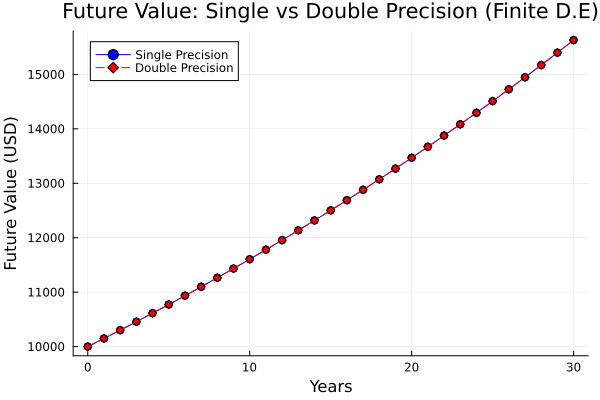

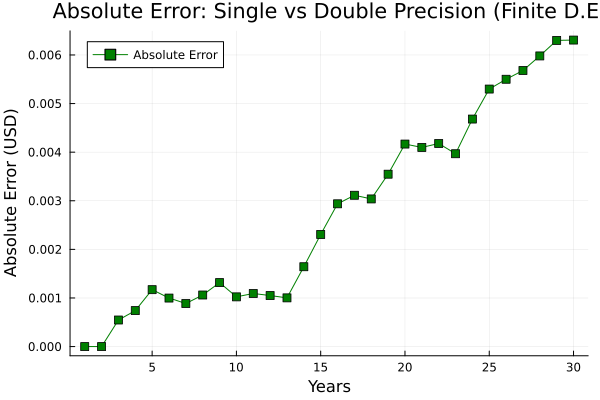

Mean Squared Error (MSE): 1.1816173989329393e-5
30×5 DataFrame
 Row │ Years  SinglePrecision  DoublePrecision  AbsoluteError  MSE        
     │ Int64  Float32          Float64          Float64        Float64    
─────┼────────────────────────────────────────────────────────────────────
   1 │     1          10150.0          10150.0    1.81899e-12  1.18162e-5
   2 │     2          10302.2          10302.2    3.63798e-12  1.18162e-5
   3 │     3          10456.8          10456.8    0.000546875  1.18162e-5
   4 │     4          10613.6          10613.6    0.000740625  1.18162e-5
   5 │     5          10772.8          10772.8    0.00117166   1.18162e-5
   6 │     6          10934.4          10934.4    0.000998801  1.18162e-5
   7 │     7          11098.4          11098.4    0.00088683   1.18162e-5
   8 │     8          11264.9          11264.9    0.00106127   1.18162e-5
   9 │     9          11433.9          11433.9    0.00131644   1.18162e-5
  10 │    10          11605.4          11605.4

In [47]:
# Example with smaller, simpler inputs
P = 10_000.0   # Principal amount ($10,000)
r = 0.03       # Annual interest rate (3%)
n = 2          # Semi-annual compounding
t_years = 30    # Total number of years (shorter time frame for testing)

# Call the finite difference function with test inputs
compound_interest_finite_diff(P, r, n, t_years)

